# House Market

Allons un peu plus loin dans python

1. Téléchargez les trois fichiers “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv”

2. Importez les trois datasets


In [58]:
import pandas as pd
import numpy as np

superficie = pd.read_csv("house market/superficie.csv", header = None)
nombre_de_sdb = pd.read_csv("house market/nombre_de_sdb.csv", header = None)
nombre_de_chambres = pd.read_csv("house market/nombre_de_chambres.csv", header = None)
house_price = pd.read_csv("house market/house_price.csv")

#datasets = {item.stem: pd.read_csv(item.name) for item in datasets}

3. Donnez un nom de colonne à ces trois datasets

In [60]:
superficie.columns = ["id", "superficie"]
nombre_de_sdb.columns = ["id", "nombre_de_sdb"]
nombre_de_chambres.columns = ["id","nombre_de_chambres"]

,id,nombre_de_sdb
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


4. Fusionner ces quatre datasets un seul dataframe (on fera une fusion simplement par index) qu’on nommera dataset

In [61]:
#dataset = pd.merge(superficie, nombre_de_sdb, on='id')
#dataset = pd.merge(dataset, nombre_de_chambres, on='id')
#dataset = pd.merge(dataset, house_price, on='id')

dataset = (superficie
            .merge(nombre_de_chambres, left_on="id", right_on="id")
            .merge(nombre_de_sdb, on="id")
            .merge(house_price , on="id")

 )
    
dataset.head(30)

,id,superficie,nombre_de_chambres,nombre_de_sdb,Unnamed: 0,house_price
0,0,28844,1,2,32,1421908.0
1,1,27667,4,1,71,1305091.0
2,2,14742,1,1,65,164373.0
3,3,28089,4,3,88,1441714.0
4,4,11713,2,1,49,108290.0
5,5,28591,4,3,33,1703033.0
6,6,17385,3,3,54,340284.0
7,7,26197,3,2,42,1236645.0
8,8,17611,3,2,20,257405.0
9,9,12841,3,3,99,157433.0


5. Quelle est la superficie moyenne des maisons de notre dataset ?

In [62]:
#20439.77
print(dataset.superficie.mean())

20439.77


6. Quelle est le nombre de chambre médian et moyen ?

,id,superficie,nombre_de_sdb,house_price
nombre_de_chambres,,,,
1,52.260870,22798.695652,1.869565,980774.869565
2,57.387097,19001.483871,2.000000,642086.258065
3,44.555556,19538.037037,2.037037,645904.592593
4,40.315789,21212.315789,1.894737,888045.631579


In [47]:
print(dataset.nombre_de_chambres.mean())
print(dataset.nombre_de_chambres.median())

2.42
2.0


7. Quel est le coût moyen d’une maison ?

In [48]:
#767747.87
print(dataset.house_price.mean())

767747.87


8. Quel est le coût moyen par chambre ?

id                        28.196095
superficie              5387.422486
nombre_de_sdb              0.814881
nombre_de_chambres         0.000000
house_price           664318.109295
dtype: float64

In [50]:
#dataset["prix par chambre"] = dataset["house_price"]/dataset["nombre_de_chambres"]
#print(dataset["prix par chambre"].mean())
dataset.groupby("nombre_de_chambres").mean()

,id,superficie,nombre_de_sdb,Unnamed: 0,house_price,prix par chambre
nombre_de_chambres,,,,,,
1,52.260870,22798.695652,1.869565,55.000000,980774.869565,980774.869565
2,57.387097,19001.483871,2.000000,50.387097,642086.258065,321043.129032
3,44.555556,19538.037037,2.037037,51.370370,645904.592593,215301.530864
4,40.315789,21212.315789,1.894737,38.736842,888045.631579,222011.407895


In [0]:
premier_decile = dataset.house_price > dataset.house_price.quantile(.1)
dernier_decile = dataset.house_price < dataset.house_price.quantile(.9)

dataset[(premier_decile) & (dernier_decile)].groupby("nombre_de_chambres").mean()

id                        52.260870
superficie             22798.695652
nombre_de_sdb              1.869565
nombre_de_chambres         1.000000
house_price           980774.869565
dtype: float64

,id,superficie,nombre_de_sdb,house_price
nombre_de_chambres,,,,
1,53.882353,22955.117647,1.823529,847546.117647
2,59.851852,19423.740741,1.925926,656395.000000
3,41.550000,20623.650000,2.050000,644955.400000
4,38.375000,20039.875000,2.000000,700004.437500


10. Le coût moyen par chambre ne nous apprend pas grand chose.Tentons de faire des catégories de superficie

  - Créez une nouvelle colonne dans votre dataset qu’on appellera taille_maison
Créez trois catégories qui respectivement correspondront à :

      - “très grande” == “une maison dont la taille est supérieure à 25 000 sqrt_feet”
      
      - “grande” == “une maison dont la taille est comprise entre 20 000 et 25 000 sqrt_feet”
      
      - “moyenne” == “une maison dont la taille est comprise entre 15 000 et 20 000 sqrt_feet”
    
      - "petite" == "une maison dont la taille est comprise entre 10 000 et 15 000 sqrt_feet” 
    
      - "très petite" == une maison dont la taille est inférieure à 10 000 sqrt_feet”
      
Remplissez les lignes correspondantes dans la colonne taille_maison

In [64]:
dataset["categorie_superficie"] = dataset.superficie
dataset["categorie_superficie"] = dataset["categorie_superficie"].apply(lambda x: "Très Grande" if x>25000 else "Grande" if x>20000 else "Moyenne" if x>15000 else "Petite" if x>10000 else "Très Petite")
dataset


,id,superficie,nombre_de_chambres,nombre_de_sdb,Unnamed: 0,house_price,categorie_superficie
0,0,28844,1,2,32,1421908.0,Très Grande
1,1,27667,4,1,71,1305091.0,Très Grande
2,2,14742,1,1,65,164373.0,Petite
3,3,28089,4,3,88,1441714.0,Très Grande
4,4,11713,2,1,49,108290.0,Petite
5,5,28591,4,3,33,1703033.0,Très Grande
6,6,17385,3,3,54,340284.0,Moyenne
7,7,26197,3,2,42,1236645.0,Très Grande
8,8,17611,3,2,20,257405.0,Moyenne
9,9,12841,3,3,99,157433.0,Petite


11. Quel est le coût moyen d’une maison en fonction de sa catégorie de superficie ?


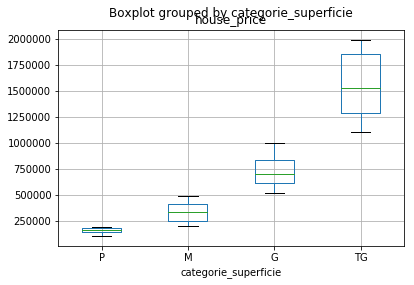

In [0]:
dataset.boxplot(column=["house_price"], by="categorie_superficie")

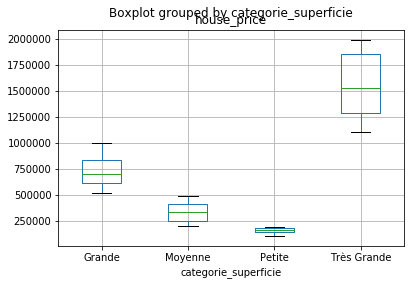

In [66]:
dataset.boxplot(column=["house_price"], by="categorie_superficie")

 12. Appliquez le code ci-dessous pour visualiser votre résultat. Que pouvez vous conclure ?

In [67]:
import seaborn as sns
sns.lmplot(x = "sqrt_meters", y="house_price", data = dataset)

KeyError: "['sqrt_meters'] not in index"

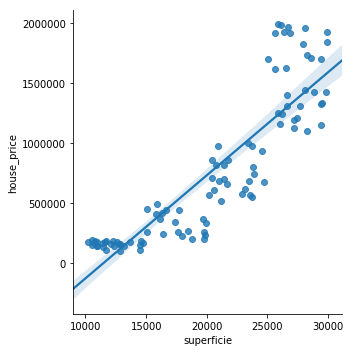

In [68]:
import seaborn as sns
sns.lmplot(x = "superficie", y="house_price", data = dataset)

On peut voir sur le graphique que plus la superficie d’une maison monte, plus son prix monte. Il y a donc une corrélation linéaire assez forte entre ces deux variables. 